In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

In [4]:
books = pd.read_csv("data_sets/books_clean.csv")
reviews = pd.read_csv("data_sets/reviews_for_recommenders.csv")

In [5]:
# Change the values of missing
missing_val = books["publisher"].iloc[0]
reviews = reviews.replace(missing_val, None)
books = books.replace(missing_val, None)

In [6]:
books["publisher"].iloc[0] == None

True

## Histrogram (not very pretty)

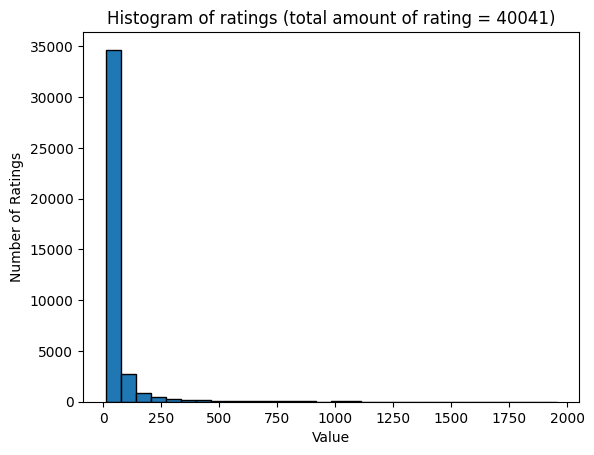

In [7]:
ratings = books["ratings_count"].tolist()

def make_hist_plot(threshold_low, threshold_high):
    threshold_ratings = []

    for i in ratings:
        if threshold_low < i < threshold_high:
            threshold_ratings.append(i)

    # Create histogram
    plt.hist(threshold_ratings, bins=30, edgecolor='black')

    # Add labels and title
    plt.xlabel('Value')
    plt.ylabel('Number of Ratings')
    plt.title('Histogram of ratings (total amount of rating = ' + str(len(threshold_ratings)) + ')')

    # Show the histogram
    plt.show()

make_hist_plot(10, 2000)

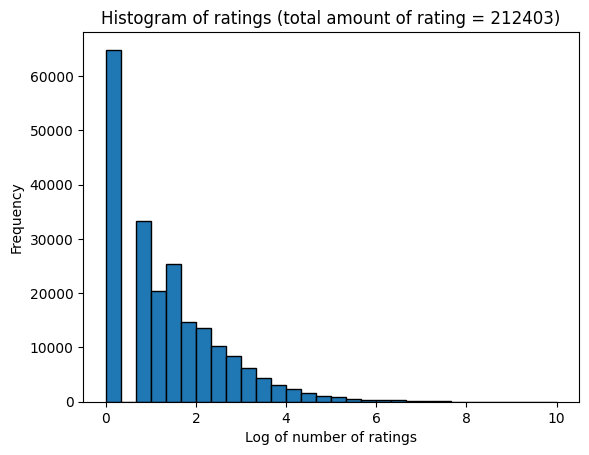

In [8]:
log_ratings = np.log(ratings)

def make_log_hist_plot():
    # Create histogram
    plt.hist(log_ratings, bins=30, edgecolor='black')

    # Add labels and title
    plt.xlabel('Log of number of ratings')
    plt.ylabel('Frequency')
    plt.title('Histogram of ratings (total amount of rating = ' + str(len(log_ratings)) + ')')

    # Show the histogram
    plt.show()

make_log_hist_plot()

## Cumulative number of reviews per books

In [9]:
def total_with_minimum(minimum, my_list):
    """
    Find the the number of books that have a minimum amount of ratings. Also find hwo many ratings are given to these most popular of books
    """
    total = 0
    count = 0
    for i in my_list:
        if i >= minimum:
            total += i
            count += 1
    return total, count

cut_offs = [1, 2, 3, 5, 10, 20, 25, 50, 100, 250, 500, 1000]
data = [total_with_minimum(i, ratings) for i in cut_offs]

# Extract x and y values from the list of tuples
x_values = [item[0] for item in data]
y_values = [item[1] for item in data]

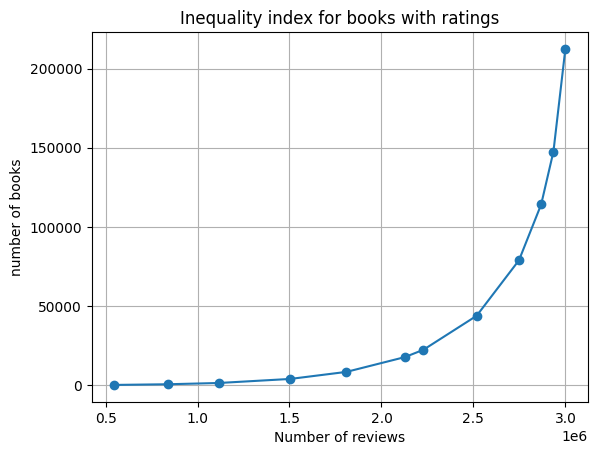

In [10]:
# Plot the data
plt.plot(x_values, y_values, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Number of reviews')
plt.ylabel('number of books')
plt.title('Inequality index for books with ratings')

# Show the plot
plt.grid(True)
plt.show()

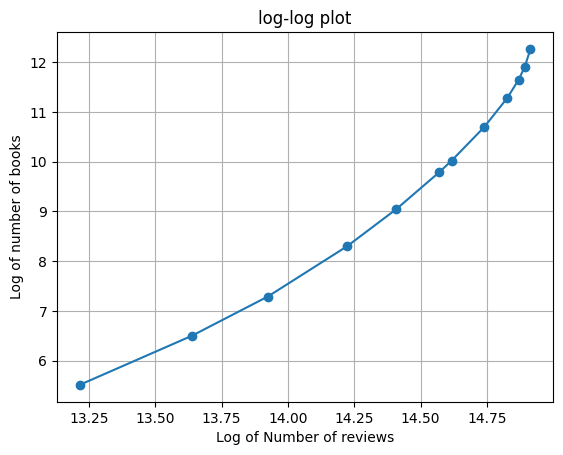

In [11]:
# Plot the data
plt.plot(np.log(x_values), np.log(y_values), marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Log of Number of reviews')
plt.ylabel('Log of number of books')
plt.title('log-log plot')

# Show the plot
plt.grid(True)
plt.show()

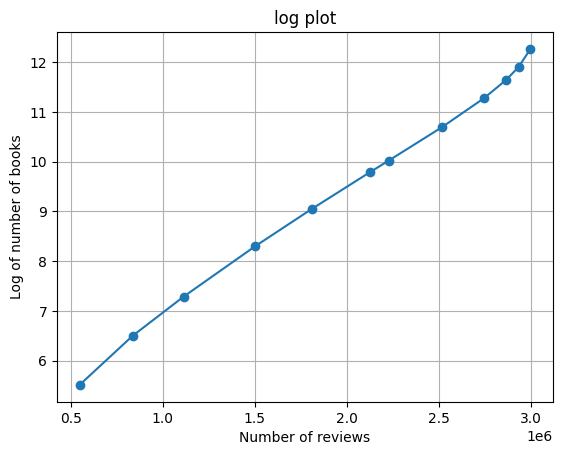

In [12]:
# Plot the data
plt.plot(x_values, np.log(y_values), marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Number of reviews')
plt.ylabel('Log of number of books')
plt.title('log plot')

# Show the plot
plt.grid(True)
plt.show()

## Cumulative number of reviews per User
Do the same as above but per users that give many reviews instead of books that have many reviews

## Correlation between average rating and number of ratings

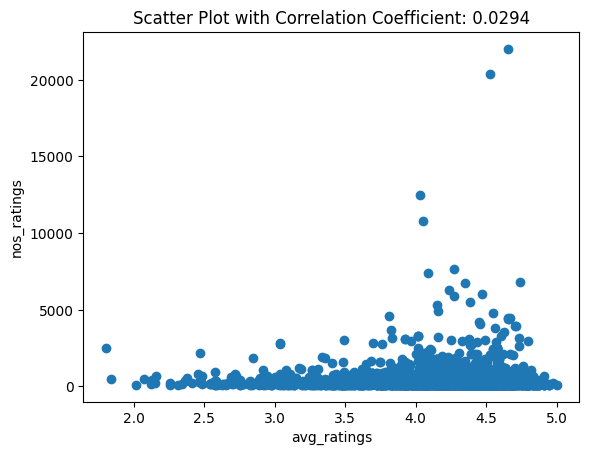

In [45]:
relevant_books = books[books["ratings_count"] > 100].copy()
avg_ratings = relevant_books["ratings_average"].values
nos_ratings = relevant_books["ratings_count"].values

# Calculate correlation coefficient
correlation_coefficient = round(np.corrcoef(avg_ratings, nos_ratings)[0, 1], 4)

# Plot
plt.scatter(avg_ratings, nos_ratings)
plt.title(f'Scatter Plot with Correlation Coefficient: {correlation_coefficient:}')
plt.xlabel('avg_ratings')
plt.ylabel('nos_ratings')
plt.show()

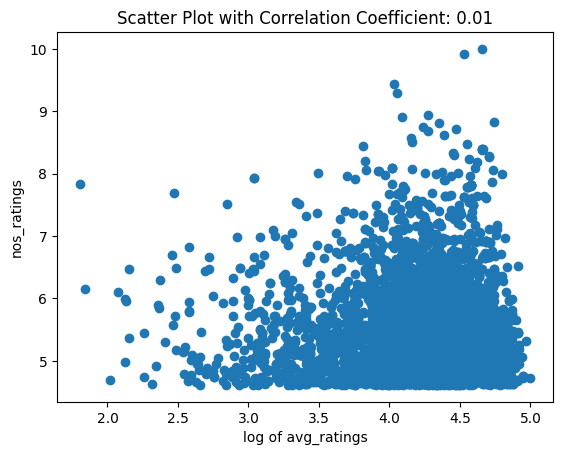

In [46]:
# Calculate correlation coefficient
correlation_coefficient = round(np.corrcoef(avg_ratings, np.log(nos_ratings))[0, 1], 4)

# Plot
plt.scatter(avg_ratings, np.log(nos_ratings))
plt.title(f'Scatter Plot with Correlation Coefficient: {correlation_coefficient:}')
plt.xlabel('log of avg_ratings')
plt.ylabel('nos_ratings')
plt.show()